In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import seaborn as sns
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [16]:

! pip install openpyxl

In [17]:
# Necessary libraries 
import pandas as pd 
import seaborn as sns
import pandas as pd
import numpy as np

In [18]:
# Reading the data
# df  = pd.read_excel("all_sentiments.csv", sheet_name="Table1") 

In [19]:
df1 = pd.read_excel('Comments - edited (modified2) 2.xlsx')

In [20]:
df1.columns

Index(['Comment', 'Sentiment', 'Percentage', 'Topic'], dtype='object')

In [21]:
df1.head()

,Comment,Sentiment,Percentage,Topic
0,"vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...",Negative,6,Shark Telecom
1,siz nətər insansız neyse 160 manat burnunuzdan...,Negative,8,Shark Telecom
2,hardadi i indi bele saf uwaqlar ve dermanlar,Negative,4,Shark Telecom
3,biz bu gün asif məhərrəmov filialından pendir ...,Negative,5,Neptun Supermarket
4,maraqlidir,Positive,6,Borani Restoran


In [22]:
df1.shape

(44298, 4)

In [23]:
df2 = pd.read_excel('exported_with_predictions.xlsx')

In [24]:
df2.head()

,Unnamed: 0,Comment_prev,Comment,predicted
0,0,Ozu.,özü,Neutral
1,1,Eve.,evə,Neutral
2,2,Esx.,eşq,Neutral
3,3,Ela.,əla,Positive
4,4,Men.,mən,Neutral


In [25]:
df2.columns

Index(['Unnamed: 0', 'Comment_prev', 'Comment', 'predicted'], dtype='object')

In [26]:
df2.columns = ['Index', 'Comment_prev', 'Comment', 'Sentiment']

In [27]:
df2.head()

,Index,Comment_prev,Comment,Sentiment
0,0,Ozu.,özü,Neutral
1,1,Eve.,evə,Neutral
2,2,Esx.,eşq,Neutral
3,3,Ela.,əla,Positive
4,4,Men.,mən,Neutral


In [28]:
df2.shape

(19950, 4)

In [29]:
# Reading the data from google drive, this is for working with google colab
# import os
# from google.colab import drive
# drive.mount("/content/drive/")
# os.chdir('/content/drive/My Drive/')
# df_bank = pd.read_excel("Comments_all_bank.xlsx")

In [30]:
# df_bank.head()

In [31]:
# df_bank.shape

In [32]:
# # Randomly delete 80% of the neutral rows
# neutral_rows= df_bank[df_bank['Sentiment'] == 'Neutral']

# delete_rows = np.random.choice(neutral_rows.index, size=int(len(neutral_rows)*0.8), replace=False)
# df_bank = df_bank.drop(delete_rows)


In [33]:
# df_bank.shape

In [34]:
df = pd.concat([df1[["Comment", "Sentiment"]], df2[["Comment", "Sentiment"]]], ignore_index=True)

In [35]:
#df.columns = ["Comment", "Sentiment"]

In [36]:
df.head()

,Comment,Sentiment
0,"vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...",Negative
1,siz nətər insansız neyse 160 manat burnunuzdan...,Negative
2,hardadi i indi bele saf uwaqlar ve dermanlar,Negative
3,biz bu gün asif məhərrəmov filialından pendir ...,Negative
4,maraqlidir,Positive


In [37]:
df.shape

(64248, 2)

In [38]:
# Working with only relevant columns
df = df[["Comment", "Sentiment"]]

In [39]:
df.head()

,Comment,Sentiment
0,"vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...",Negative
1,siz nətər insansız neyse 160 manat burnunuzdan...,Negative
2,hardadi i indi bele saf uwaqlar ve dermanlar,Negative
3,biz bu gün asif məhərrəmov filialından pendir ...,Negative
4,maraqlidir,Positive


In [40]:
df.shape

(64248, 2)

In [41]:
# Do we have NA in data?
df.isna().sum()

Comment         56
Sentiment    18990
dtype: int64

In [42]:
# Deleting the rows that have NA
df.dropna(inplace=True)

In [43]:
# resetting index
df.reset_index(drop=True, inplace=True)

In [44]:
df.shape # We have 13522 labeled sentences

(45206, 2)

In [45]:
df.head()

,Comment,Sentiment
0,"vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...",Negative
1,siz nətər insansız neyse 160 manat burnunuzdan...,Negative
2,hardadi i indi bele saf uwaqlar ve dermanlar,Negative
3,biz bu gün asif məhərrəmov filialından pendir ...,Negative
4,maraqlidir,Positive


<Axes: xlabel='Sentiment', ylabel='count'>

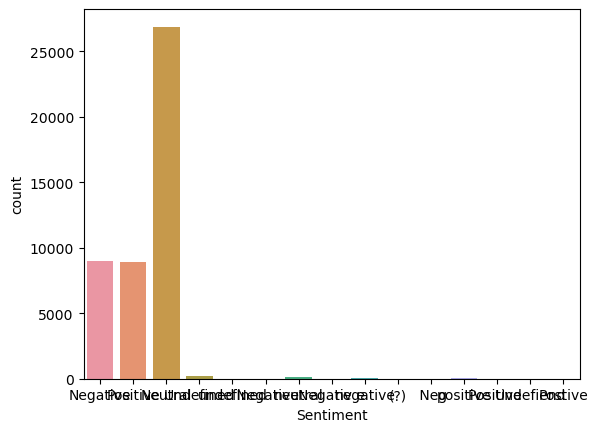

In [46]:
# It seems you made a mistake while labeling 
sns.countplot(x = "Sentiment", data = df)

In [47]:
df["Sentiment"].value_counts()

Neutral      26879
Negative      8972
Positive      8880
Undefined      227
neutral        154
negative        54
positive        22
Positive         5
Postive          4
 Negative        3
(?)              2
undefined        1
Negativ e        1
 Neg             1
Undefiend        1
Name: Sentiment, dtype: int64

In [48]:
df["Sentiment"].unique()

array(['Negative', 'Positive', 'Neutral', 'Undefined', 'undefined',
       ' Negative', 'neutral', 'Negativ e', 'negative', '(?)', ' Neg',
       'positive', 'Positive ', 'Undefiend', 'Postive'], dtype=object)

In [49]:
# Deleting the rows that their sentiment column is --> Undefined, (?),  Undefiend, undefined
df.loc[df['Sentiment'].isin(['Undefined', '(?)', 'Undefiend', 'undefined'])]
# Totally 301 rows

,Comment,Sentiment
130,сен онларын чавабыны козле,Undefined
140,@seqlb bəs rusiyaya bu qədər lənət deyirsənsə ...,Undefined
144,bunkerdən çıx,Undefined
164,@nigarturan169 hede gerey sosiska yeyesiz gedi...,Undefined
241,yaziğin dili çixdi işlemekdem,Undefined
...,...,...
12834,şənbə e-moizəsini başladı virtual sufi:- özünü...,Undefined
12835,necə istəyirsən,Undefined
12852,şəbiynən mesajlarımızı görsəz elə bil 2 sevgil...,Undefined
12862,harda çox sayda hüq…,Undefined


In [50]:
# Taking their indexes to delete
must_delete = df.loc[df['Sentiment'].isin(['Undefined', '(?)', 'Undefiend', 'undefined', 'ne', 'neh'])].index

In [51]:
df.drop(must_delete, inplace=True)

In [52]:
df.shape # Deleted 301 rows

(44975, 2)

In [53]:
df.reset_index(inplace=True, drop="True")

In [54]:
df.head()

,Comment,Sentiment
0,"vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...",Negative
1,siz nətər insansız neyse 160 manat burnunuzdan...,Negative
2,hardadi i indi bele saf uwaqlar ve dermanlar,Negative
3,biz bu gün asif məhərrəmov filialından pendir ...,Negative
4,maraqlidir,Positive


In [55]:
df["Sentiment"].value_counts()

Neutral      26879
Negative      8972
Positive      8880
neutral        154
negative        54
positive        22
Positive         5
Postive          4
 Negative        3
Negativ e        1
 Neg             1
Name: Sentiment, dtype: int64

In [56]:
df["Sentiment"].unique()

array(['Negative', 'Positive', 'Neutral', ' Negative', 'neutral',
       'Negativ e', 'negative', ' Neg', 'positive', 'Positive ',
       'Postive'], dtype=object)

In [57]:
# Changing negative, Neg, Negativ e to Negative
df.loc[df['Sentiment'].isin(['Negativ e', ' Negative', 'negative', ' Neg'])]

,Comment,Sentiment
590,😥,Negative
2825,gözlərivi yox gözlərini olmalidi,Negativ e
2962,simnar xanın allah cəsasını versin🤬😠😡😤😈,negative
2984,bacarırlar belə kinolar çəksinlər ey neçə illə...,negative
3013,insanin hovselesi catmir qulaq asmaga,negative
3016,bir sözü 50 defe deme ne olar,negative
3017,men etim unu ölçusunu sef deyir,negative
3064,"her shey yaxshidi ,amma chox danishmaq 0 !!! y...",negative
3065,ses adami bezdirir,negative
3107,ağzını çox marcildadir hövsələm çatmadı baxmağ...,negative


In [58]:
df["Sentiment"] = df["Sentiment"].replace(['Negativ e', ' Negative', 'negative', ' Neg'], "Negative")

In [59]:
df["Sentiment"].value_counts()

Neutral      26879
Negative      9031
Positive      8880
neutral        154
positive        22
Positive         5
Postive          4
Name: Sentiment, dtype: int64

In [60]:
df["Sentiment"].unique()

array(['Negative', 'Positive', 'Neutral', 'neutral', 'positive',
       'Positive ', 'Postive'], dtype=object)

In [61]:
df["Sentiment"] = df["Sentiment"].replace(['neutral', ' Neutral', 'Neutal'], 'Neutral')

In [62]:
df["Sentiment"].value_counts()

Neutral      27033
Negative      9031
Positive      8880
positive        22
Positive         5
Postive          4
Name: Sentiment, dtype: int64

In [63]:
df["Sentiment"].unique()

array(['Negative', 'Positive', 'Neutral', 'positive', 'Positive ',
       'Postive'], dtype=object)

In [64]:
df["Sentiment"] = df["Sentiment"].replace(['positive', 'Positive ', 'Postive'], 'Positive')

In [65]:
df["Sentiment"].value_counts() # Now you have 3 sentiments

Neutral     27033
Negative     9031
Positive     8911
Name: Sentiment, dtype: int64

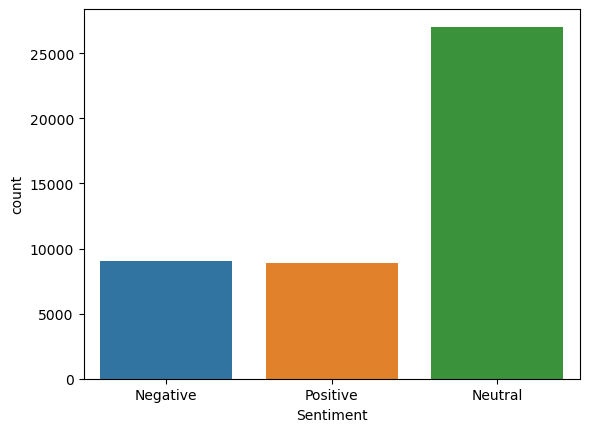

In [66]:
sns.countplot(x = "Sentiment", data = df); # General distribution

In [67]:
df.reset_index(inplace=True, drop=True)

In [68]:
# Split data into sentences and labels
sentences = df['Comment'].values
labels = df['Sentiment'].values.reshape(-1, 1)

In [69]:
from sklearn import preprocessing

In [70]:
enc = preprocessing.OneHotEncoder()
enc.fit(labels)



OneHotEncoder()

In [71]:
y = enc.transform(labels).todense()

In [72]:
# Split data into train and test sets
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.15, random_state=123)

sentences_train = sentences_train.astype(str)
sentences_test = sentences_test.astype(str)

In [73]:
# Create the CountVectorizer object
vectorizer = CountVectorizer(analyzer="char_wb", ngram_range=(4, 4))

In [74]:
# Fit the vectorizer to the training set
vectorizer.fit(sentences_train)
vectorizer.fit(sentences_test)


CountVectorizer(analyzer='char_wb', ngram_range=(4, 4))

In [75]:
# Transform the training and testing set into feature vectors
X_train = vectorizer.transform(sentences_train).todense()
X_test = vectorizer.transform(sentences_test).todense()

MemoryError: Unable to allocate 9.09 GiB for an array with shape (38228, 31903) and data type int64

In [ ]:
X_train

In [ ]:
input_dim = X_train.shape[1]
input_dim

In [82]:
model = tf.keras.models.Sequential([    
    tf.keras.layers.InputLayer(input_shape=(input_dim,)),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [83]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2048)              65339392  
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                131136    
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 65,470,723
Trainable params: 65,470,723
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit(
    x=X_train,
    y=y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    batch_size=16,
    verbose=1,
)

2390/2390 [==============================] - 247s 103ms/step - loss: 0.7027 - accuracy: 0.7266 - precision_1: 0.7631 - recall_1: 0.6534 - val_loss: 0.6044 - val_accuracy: 0.7685 - val_precision_1: 0.7867 - val_recall_1: 0.7381


In [86]:

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(accuracy))

211/211 [==============================] - 8s 34ms/step - loss: 0.6044 - accuracy: 0.7685 - precision_1: 0.7867 - recall_1: 0.7381
Test Accuracy: [0.604414701461792, 0.7684897184371948, 0.7867298722267151, 0.738105833530426]


In [87]:
# Evaluate the model on the train set
accuracy = model.evaluate(X_train, y_train)
print('Test Accuracy: {}'.format(accuracy))

1195/1195 [==============================] - 40s 33ms/step - loss: 0.4297 - accuracy: 0.8465 - precision_1: 0.8677 - recall_1: 0.8192
Test Accuracy: [0.4296737611293793, 0.8465260863304138, 0.8676992058753967, 0.8192163109779358]
